In [1]:
#Social_Network_Ads.csv

**Import libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the dataset**

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [5]:
gender_encode = pd.get_dummies(df['Gender'])
df = pd.concat([df, gender_encode], axis = 1)
df.drop(['Gender'], axis = 1, inplace = True)

In [6]:
df.head()

,User ID,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


**Splitting the dataset into the Training set and Test set**

In [7]:
X = df.drop(['Purchased', 'User ID'], axis = 1)
y = df[['Purchased']]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**Feature Scaling**

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
mms = MinMaxScaler()

In [12]:
names = X.columns

In [13]:
X_train = mms.fit_transform(X_train)
X_test = mms.fit_transform(X_test)

In [14]:
X_train = pd.DataFrame(X_train, columns = [names])
X_test = pd.DataFrame(X_test, columns = [names])

**Fitting SVM to the Training set**

In [15]:
from sklearn.svm import SVC

In [16]:
svc = SVC()

In [17]:
svc.fit(X_train, y_train)

C:\Users\wiki\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

**Predicting the Test set results**

In [18]:
y_pred = svc.predict(X_test)

**Making the Confusion Matrix**

In [19]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\wiki\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


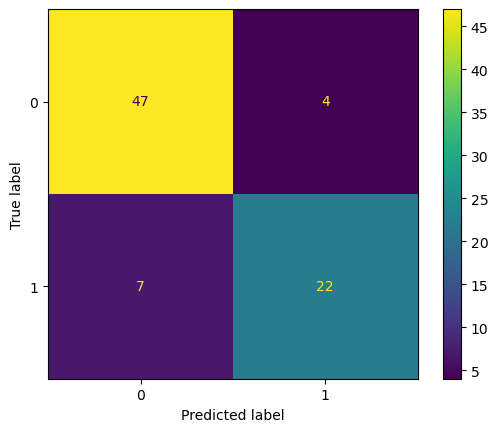

In [20]:
plot_confusion_matrix(svc, X_test, y_test)

**Visualising the Training set results**

In [21]:
#from matplotlib.colors import ListedColormap

# markers = ('h', 's', 'd')
# colors = ('red', 'green', 'blue')
# cmap = ListedColormap(colors[:len(np.unique(y_test))])

# X = X_train.iloc[:, [1, 2]].to_numpy()

# y = y_train['Purchased'].to_numpy()

# svm = SVC()

# svm.fit(X, y)

      # plot the decision surface
# resolution = 0.02    
# x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
# Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
# Z = Z.reshape(xx1.shape)
# plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
# plt.xlim(xx1.min(), xx1.max())
# plt.ylim(xx2.min(), xx2.max())

# for index, col in enumerate(np.unique(y)):
#     plt.scatter(x = X[y == col, 0], y = X[y == col, 1], alpha = 0.8, c=cmap(index), marker = markers[index], label = col)
#     plt.legend()

In [25]:
from mlxtend.plotting import plot_decision_regions    

In [47]:
def svm_train_plot(data):
    x = data[['EstimatedSalary','Age']].values
    y = data['Purchased'].astype(int).values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    svm = SVC()
    svm.fit(x_train, y_train)
    plot_decision_regions(x_train, y_train, clf = svm, legend=2)
    plt.xlabel('Salary')
    plt.ylabel('Age')
    plt.title('SVM decision boundary')
    plt.show() 

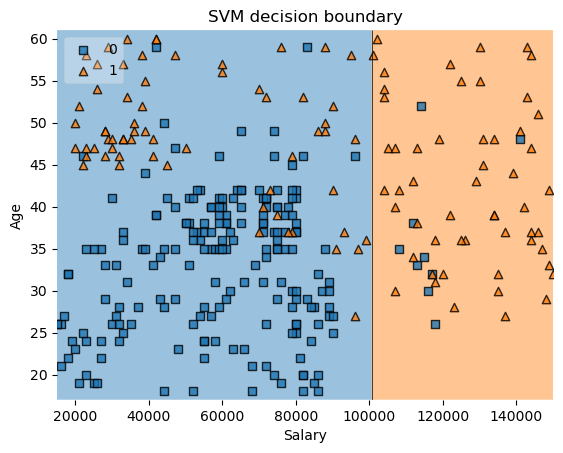

In [48]:
 svm_train_plot(data = df)

**Visualising the Test set results**

In [54]:
def svm_test_plot(data):
    x = data[['EstimatedSalary','Age']].values
    y = data['Purchased'].astype(int).values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    svm = SVC()
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    plot_decision_regions(x_test, y_pred, clf = svm, legend=2)
    #plot_decision_regions(x_test, y_test, clf = svm, legend=2)
    plt.xlabel('Salary')
    plt.ylabel('Age')
    plt.title('SVM decision boundary')
    plt.show() 

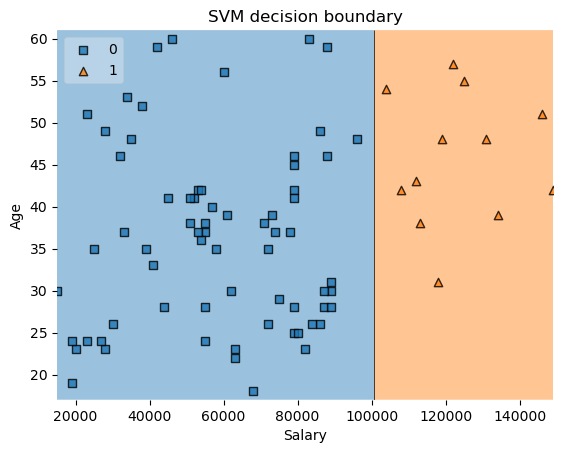

In [55]:
svm_test_plot(data = df)